In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 
from sklearn.svm import SVC 
from sklearn.neural_network import  MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import brier_score_loss 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import log_loss 
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
from pathlib import Path 

In [7]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('../data/modeling/womens_reg_season_ml.csv')
# Find rows that contain NaN values
df = df_filtered = df[~((df['Season'] == 2010) & ((df['Team1'] == 3445) | (df['Team2'] == 3445)))]
df


,Season,DayNum,Team1,Team2,Team1_Wins,Win_Percentage_1,Points_Per_Game_1,FG_Percentage_1,Threes_Per_Game_1,Three_Point_Percentage_1,Free_Throws_Per_Game_1,Free_Throw_Percentage_1,Offensive_Rebound_Rate_1,Defensive_Rebound_Rate_1,Turnovers_Per_Game_1,Opp_FG_Percentage_1,Opp_Three_Point_Percentage_1,Opp_Free_Throws_Per_Game_1,Opp_Turnovers_Per_Game_1,Win_pct_last_10_games_1,Win_Percentage_2,Points_Per_Game_2,FG_Percentage_2,Threes_Per_Game_2,Three_Point_Percentage_2,Free_Throws_Per_Game_2,Free_Throw_Percentage_2,Offensive_Rebound_Rate_2,Defensive_Rebound_Rate_2,Turnovers_Per_Game_2,Opp_FG_Percentage_2,Opp_Three_Point_Percentage_2,Opp_Free_Throws_Per_Game_2,Opp_Turnovers_Per_Game_2,Win_pct_last_10_games_2
0,2010,11,3103,3237,1,0.566667,62.233333,40.229192,12.466667,31.550802,19.600000,70.578231,39.664804,63.351254,18.266667,38.144330,31.868132,18.833333,18.700000,0.6,0.071429,51.321429,36.697248,11.964286,22.686567,17.785714,64.457831,33.930348,62.327416,23.571429,42.803504,37.111111,21.392857,16.785714,0.1
1,2010,11,3104,3399,1,0.379310,64.137931,39.811216,14.724138,29.508197,16.793103,61.601643,35.353535,63.567202,19.172414,39.736239,30.897704,21.965517,19.241379,0.3,0.448276,65.241379,38.811189,19.482759,31.327434,20.827586,63.410596,34.096692,67.625899,16.724138,40.781441,32.832080,25.206897,15.793103,0.6
2,2010,11,3110,3224,1,0.619048,60.428571,40.017668,15.285714,30.529595,16.809524,75.070822,37.174211,65.369128,15.190476,37.803780,28.859060,15.000000,16.428571,0.8,0.517241,56.862069,34.720571,11.413793,24.169184,19.862069,69.618056,38.799662,65.033622,15.758621,39.041534,30.297030,17.482759,17.034483,0.6
3,2010,11,3111,3267,1,0.612903,66.419355,43.329718,12.387097,34.635417,16.612903,63.689320,39.198606,67.034700,21.225806,36.348774,32.871972,20.548387,18.161290,0.7,0.448276,59.310345,40.371926,9.275862,28.624535,18.172414,56.356736,38.584071,65.796831,17.448276,39.742805,38.274336,17.448276,16.310345,0.2
4,2010,11,3119,3447,1,0.333333,52.291667,35.797665,16.916667,27.339901,13.875000,67.267267,33.107345,62.500000,17.208333,37.899543,34.493671,18.458333,16.291667,0.3,0.300000,60.333333,37.290034,16.566667,31.388330,15.266667,70.305677,35.672515,64.305428,19.766667,40.988547,36.363636,22.066667,19.500000,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161689,2025,106,3416,3242,0,0.360000,67.080000,41.105929,14.160000,30.790960,18.920000,70.613108,32.680539,72.081218,15.960000,43.116185,34.523810,15.960000,15.760000,0.2,0.576923,66.769231,42.659884,18.807692,35.173824,20.038462,74.856046,19.633508,73.072215,13.807692,42.024129,34.352518,16.346154,14.115385,0.4
161690,2025,106,3428,3329,0,0.769231,77.769231,47.572178,26.230769,37.976540,16.000000,75.240385,30.298913,78.239609,15.192308,40.498652,32.842105,12.961538,16.461538,0.7,0.807692,78.038462,46.230530,23.653846,35.121951,18.153846,69.703390,32.957393,77.324263,14.692308,36.274510,26.824818,15.153846,16.000000,0.7
161691,2025,106,3194,3349,0,0.370370,60.740741,36.303030,20.851852,31.261101,16.111111,61.149425,29.607251,69.005236,15.629630,40.257461,32.730263,12.407407,15.111111,0.1,0.500000,66.384615,41.176471,20.153846,31.679389,13.961538,71.074380,28.486293,76.553980,15.423077,38.695090,30.212766,16.846154,13.846154,0.4
161692,2025,106,3150,3378,0,0.320000,60.760000,37.799718,17.600000,27.500000,18.520000,70.410367,32.922318,67.185473,16.480000,41.742797,31.746032,20.320000,15.880000,0.3,0.703704,66.185185,42.111801,15.592593,34.441805,15.148148,69.926650,32.429379,73.155985,13.296296,40.725806,31.263383,14.592593,15.814815,0.8


# Logistic Regression 

In [11]:
x = df.drop(columns=['Season', 'DayNum', 'Team1', 'Team2', 'Team1_Wins', 
                     'Win_pct_last_10_games_1', 'Win_pct_last_10_games_2']) 

y = df['Team1_Wins']

# Train the model 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=57)

# Normalize the data 
scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
logreg = LogisticRegression(C=100)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=100)

### Feature Engineering

**Analyze which features are the most important**

In [12]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': logreg.coef_[0]
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance

,Feature,Importance
14,Win_Percentage_2,-1.005310
15,Points_Per_Game_2,-0.359586
9,Turnovers_Per_Game_1,-0.146340
10,Opp_FG_Percentage_1,-0.115529
5,Free_Throws_Per_Game_1,-0.101724
12,Opp_Free_Throws_Per_Game_1,-0.093934
3,Threes_Per_Game_1,-0.086842
6,Free_Throw_Percentage_1,-0.072261
21,Offensive_Rebound_Rate_2,-0.057675
8,Defensive_Rebound_Rate_1,-0.048551


**Identify which features are highly correlated and can be removed**

In [13]:
corr_matrix = X_train.corr().abs() 
# Select upper triangle of correlation matrix (to avoid duplicate pairs)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find features with correlation > 0.9
high_correlation = [(column, index) for column in upper.columns for index in upper.index if upper[column][index] > 0.7]

# Print correlated feature pairs
for f1, f2 in high_correlation:
    print(f"High correlation: {f1} <--> {f2} (r = {corr_matrix.loc[f1, f2]:.2f})")

High correlation: FG_Percentage_1 <--> Points_Per_Game_1 (r = 0.85)
High correlation: Three_Point_Percentage_1 <--> Points_Per_Game_1 (r = 0.71)
High correlation: Three_Point_Percentage_1 <--> FG_Percentage_1 (r = 0.79)
High correlation: Defensive_Rebound_Rate_1 <--> FG_Percentage_1 (r = 0.73)
High correlation: Opp_Three_Point_Percentage_1 <--> Opp_FG_Percentage_1 (r = 0.77)
High correlation: FG_Percentage_2 <--> Points_Per_Game_2 (r = 0.85)
High correlation: Three_Point_Percentage_2 <--> Points_Per_Game_2 (r = 0.71)
High correlation: Three_Point_Percentage_2 <--> FG_Percentage_2 (r = 0.79)
High correlation: Defensive_Rebound_Rate_2 <--> FG_Percentage_2 (r = 0.73)
High correlation: Opp_Three_Point_Percentage_2 <--> Opp_FG_Percentage_2 (r = 0.77)


### Model Evaluation

Brier Score: 0.1603
Accuracy: 0.7617
Log Loss: 0.4842
ROC-AUC Score: 0.8459


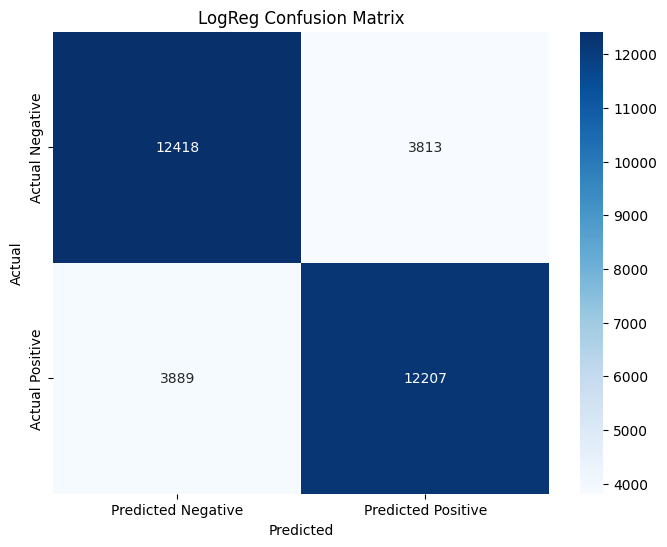

In [14]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)
y_pred_probs = logreg.predict_proba(X_test_scaled)[:, 1]

brier = brier_score_loss(y_test, y_pred_probs)
print(f'Brier Score: {brier:.4f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

logloss = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {logloss:.4f}')

auc = roc_auc_score(y_test, y_pred_probs)
print(f'ROC-AUC Score: {auc:.4f}')

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LogReg Confusion Matrix')
plt.show()

### Outcome 
After analyzing the different solvers I identified that the defaul 'lbfgs' performed the best and worked well with the large feature set. It is also noted that setting C to 100 to implement a weaker regularization improved the model 

**Feature Importance** 

Features that were found to have minimal impact on the model include: 
  - **Conf_pac_10**: Conference rebranded to the Pac 12 with the addition of Colorado and Utah 
  - **Conf_gwc**: Great Western Conference became defunct in 2014
  - **Conf_mid_cont**: Mid Continental conference rebranded to the summit league in 2007

**Feature Correlation** 

Effective FG Percentage and FG Percentage were highly correlated, as expceted. This led me to remove Effective FG Percentage which helped increase the brier score for the model 



# K-Nearest Neighbors (k-NN)

k-NN Brier Score: 0.1684
k-NN Accuracy: 0.7486
k-NN Log Loss: 0.5305
k-NN ROC-AUC Score: 0.8301


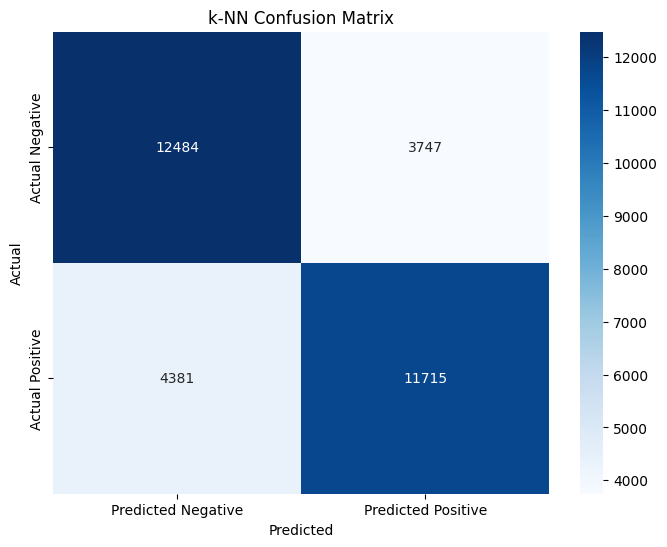

In [15]:
# k-NN model
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)
y_pred_probs_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
knn_brier = brier_score_loss(y_test, y_pred_probs_knn)
print(f'k-NN Brier Score: {knn_brier:.4f}')

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'k-NN Accuracy: {knn_accuracy:.4f}')

knn_logloss = log_loss(y_test, y_pred_probs_knn)
print(f'k-NN Log Loss: {knn_logloss:.4f}')

knn_auc = roc_auc_score(y_test, y_pred_probs_knn)
print(f'k-NN ROC-AUC Score: {knn_auc:.4f}')

# Calculate and display the confusion matrix
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('k-NN Confusion Matrix')
plt.show()

# Decision Trees

## Boosting - Random Forest 

Random Forest Brier Score: 0.1969
Random Forest Accuracy: 0.7141
Random Forest Log Loss: 0.6116
Random Forest ROC-AUC Score: 0.7889


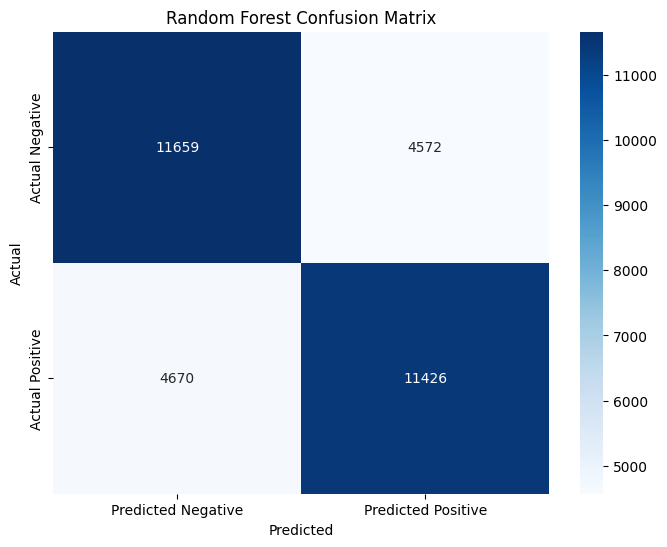

In [16]:
# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)
y_pred_probs_rf = rf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
rf_brier = brier_score_loss(y_test, y_pred_probs_rf)
print(f'Random Forest Brier Score: {rf_brier:.4f}')

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

rf_logloss = log_loss(y_test, y_pred_probs_rf)
print(f'Random Forest Log Loss: {rf_logloss:.4f}')

rf_auc = roc_auc_score(y_test, y_pred_probs_rf)
print(f'Random Forest ROC-AUC Score: {rf_auc:.4f}')

# Calculate and display the confusion matrix
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


## Bagging - Extreme Gradient Boosting

In [17]:
# Define the parameter grid
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 10),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5)
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss")

# Set up Randomized Search with Brier Score
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of different parameter combinations to try
    scoring='neg_brier_score',  # Minimizing Brier Score
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best Brier Score (negated back to positive)
best_brier_score = -random_search.best_score_
print("Best Brier Score:", best_brier_score)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.875, learning_rate=0.1711111111111111, max_depth=3, min_child_weight=1, n_estimators=400, subsample=0.875; total time=  10.5s
[CV] END colsample_bytree=0.875, learning_rate=0.2677777777777778, max_depth=3, min_child_weight=4, n_estimators=600, subsample=1.0; total time=  14.7s
[CV] END colsample_bytree=0.875, learning_rate=0.2677777777777778, max_depth=3, min_child_weight=4, n_estimators=600, subsample=1.0; total time=  14.7s
[CV] END colsample_bytree=0.875, learning_rate=0.2677777777777778, max_depth=3, min_child_weight=4, n_estimators=600, subsample=1.0; total time=  14.8s
[CV] END colsample_bytree=0.875, learning_rate=0.1711111111111111, max_depth=3, min_child_weight=1, n_estimators=400, subsample=0.875; total time=  10.5s
[CV] END colsample_bytree=0.875, learning_rate=0.2677777777777778, max_depth=8, min_child_weight=1, n_estimators=200, subsample=0.875; total time=  22.8s
[CV] END colsample_by

XGBoost Brier Score: 0.1592
XGBoost Accuracy: 0.7626
XGBoost Log Loss: 0.4810
XGBoost ROC-AUC Score: 0.8479


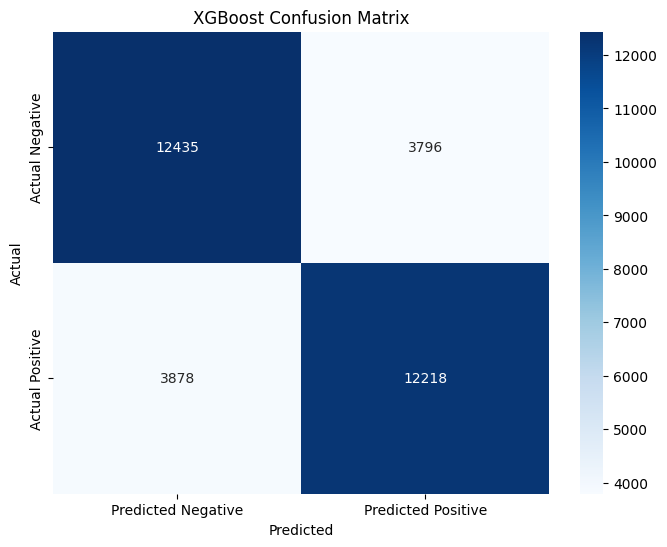

In [18]:
# Train the tuned XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic", eval_metric="logloss",
    subsample=0.5, n_estimators=500, min_child_weight=1, max_depth=7,
    learning_rate=0.01, colsample_bytree=0.75
)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
xgb_brier = brier_score_loss(y_test, y_pred_probs_xgb)
print(f'XGBoost Brier Score: {xgb_brier:.4f}')

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')

xgb_logloss = log_loss(y_test, y_pred_probs_xgb)
print(f'XGBoost Log Loss: {xgb_logloss:.4f}')

xgb_auc = roc_auc_score(y_test, y_pred_probs_xgb)
print(f'XGBoost ROC-AUC Score: {xgb_auc:.4f}')

# Calculate and display the confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Neural Network

In [67]:
# Train the Neural Network Model 
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Two hidden layers with 128 and 64 neurons
    activation='relu',             # Use ReLU activation for non-linearity
    solver='adam',                 # Adam optimizer
    alpha=0.01,                    # L2 regularization (to prevent overfitting)
    max_iter=500,                  # Number of training iterations
    random_state=57
)

mlp.fit(X_train_scaled, y_train)

# Get predicted probabilities
y_pred_proba = mlp.predict_proba(X_test_scaled)[:, 1]

# Calculate Brier Score (since lower is better)
brier_score = brier_score_loss(y_test, y_pred_proba)
print("Brier Score (Neural Network):", brier_score)



Brier Score (Neural Network): 0.20433982937698433


# Final Predictions 

In [23]:
# Use the regular season model to create predictions on the post season 
final_ml = pd.read_csv('../data/modeling/womens_tourney_ml.csv')
original_features = X_train.columns 
post_season = final_ml[original_features]

postseason_predictions = xgb_model.predict_proba(post_season)[:, 1]
final_ml['reg_season_pred'] = postseason_predictions
final_ml.columns

Index(['Season', 'DayNum', 'Team1', 'Team2', 'Team1_Wins', 'Win_Percentage_1',
       'Points_Per_Game_1', 'FG_Percentage_1', 'Threes_Per_Game_1',
       'Three_Point_Percentage_1', 'Free_Throws_Per_Game_1',
       'Free_Throw_Percentage_1', 'Offensive_Rebound_Rate_1',
       'Defensive_Rebound_Rate_1', 'Turnovers_Per_Game_1',
       'Opp_FG_Percentage_1', 'Opp_Three_Point_Percentage_1',
       'Opp_Free_Throws_Per_Game_1', 'Opp_Turnovers_Per_Game_1',
       'Win_pct_last_10_games_1', 'Win_Percentage_2', 'Points_Per_Game_2',
       'FG_Percentage_2', 'Threes_Per_Game_2', 'Three_Point_Percentage_2',
       'Free_Throws_Per_Game_2', 'Free_Throw_Percentage_2',
       'Offensive_Rebound_Rate_2', 'Defensive_Rebound_Rate_2',
       'Turnovers_Per_Game_2', 'Opp_FG_Percentage_2',
       'Opp_Three_Point_Percentage_2', 'Opp_Free_Throws_Per_Game_2',
       'Opp_Turnovers_Per_Game_2', 'Win_pct_last_10_games_2', 'Seed_1',
       'Seed_2', 'reg_season_pred'],
      dtype='object')

In [22]:
output_dir = Path("..") / "data" / "modeling"
output_dir.mkdir(parents=True, exist_ok =True)
final_output_path = output_dir / "womens_final_ml.csv"
final_ml.to_csv(final_output_path, index=False)